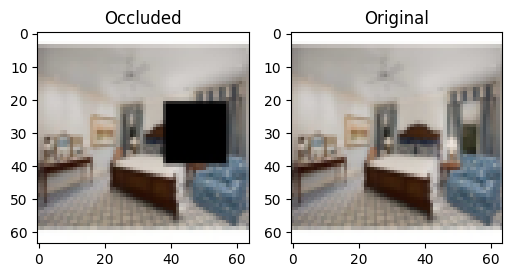

In [1]:
import os, sys
# Add project root to sys.path (in case it's not there)
sys.path.append(os.path.abspath(".."))
from src.dataset import PairedImageDataset
import matplotlib.pyplot as plt

# Correct relative paths (since we're inside 'notebooks/')
dataset = PairedImageDataset("../data/train/occluded", "../data/train/original")

occluded, original, name = dataset[0]

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(occluded.permute(1, 2, 0))
plt.title("Occluded")

plt.subplot(1, 2, 2)
plt.imshow(original.permute(1, 2, 0))
plt.title("Original")
plt.show()


In [2]:
from src.model import PixelRNN
import torch

model = PixelRNN(input_channels=3, hidden_dim=64)
x = torch.randn(1, 3, 64, 64)   # sample occluded image
y = model(x)

print("Output shape:", y.shape)
# Expected: torch.Size([1, 3, 64, 64])


Output shape: torch.Size([1, 3, 64, 64])


Training on cpu
Epoch [1/10] - Loss: 0.0331
Epoch [2/10] - Loss: 0.0106
Epoch [3/10] - Loss: 0.0089
Epoch [4/10] - Loss: 0.0080
Epoch [5/10] - Loss: 0.0075
Epoch [6/10] - Loss: 0.0072
Epoch [7/10] - Loss: 0.0070
Epoch [8/10] - Loss: 0.0068
Epoch [9/10] - Loss: 0.0067
Epoch [10/10] - Loss: 0.0066

✅ Training complete!
Checkpoints saved to: c:\Users\Ahmad\OneDrive\Desktop\GenAI\Assign2\Task1\PixelHeal\outputs/checkpoints
Logs saved to: c:\Users\Ahmad\OneDrive\Desktop\GenAI\Assign2\Task1\PixelHeal\outputs/logs
Sample figures saved to: c:\Users\Ahmad\OneDrive\Desktop\GenAI\Assign2\Task1\PixelHeal\outputs/figures


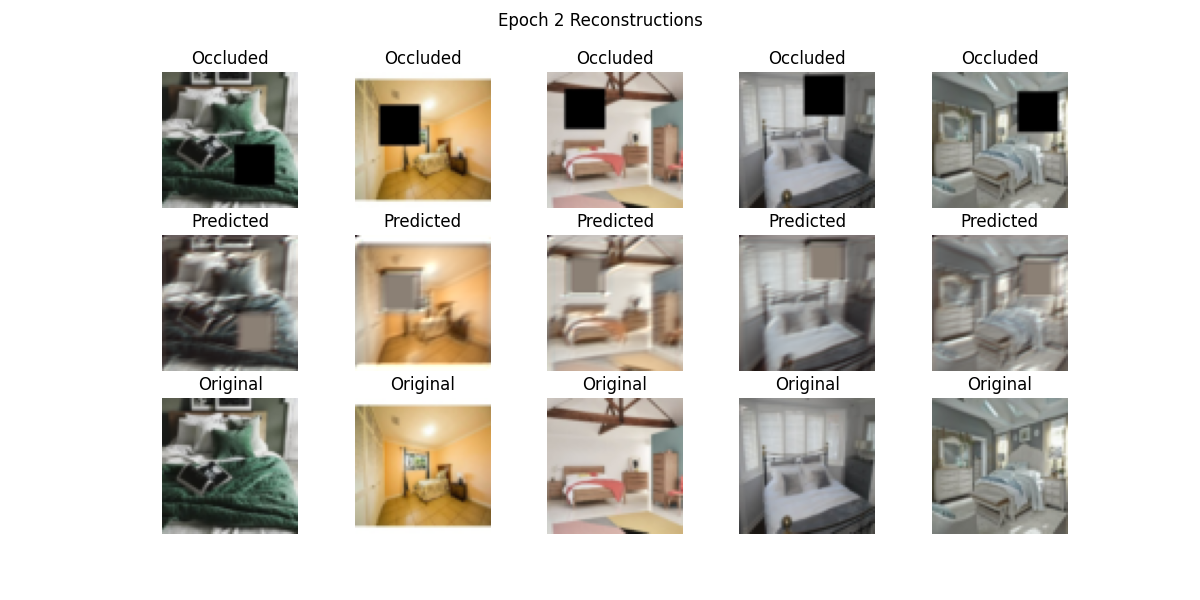

In [3]:
from src.train import train_model
from PIL import Image
from IPython.display import display


# Training Configuration
config = {
    "occluded_dir": "../data/train/occluded",
    "original_dir": "../data/train/original",
    "batch_size": 8,
    "num_epochs": 10,
    "lr": 1e-3,
    "img_size": 64,
    "checkpoint_dir": "outputs/checkpoints",
    "log_dir": "outputs/logs",
    "figures_dir": "outputs/figures",
    "save_figures": True
}

model = train_model(**config)

fig_path = "../outputs/figures/epoch_2_samples.png"  # or latest epoch
display(Image.open(fig_path))